# 🩺 Diabetes Prediction using Classification Algorithms

This notebook compares four popular classification algorithms:
- **Support Vector Machine (SVM)**
- **Naive Bayes**
- **Decision Tree**
- **K-Nearest Neighbors (KNN)**

We'll predict diabetes based on medical features and compare their performance using various metrics.

## 1. Import Required Libraries

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning algorithms
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Model evaluation and preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_curve, auc
)

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('default')
sns.set_palette("husl")

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


## 2. Load and Explore the Dataset

In [2]:
# Load the dataset
column_names = [
    'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
    'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'
]

df = pd.read_csv('pima-indians-diabetes.data.csv', names=column_names)

print("📊 Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print("\n📋 First 5 rows:")
display(df.head())

📊 Dataset loaded successfully!
Dataset shape: (768, 9)

📋 First 5 rows:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Basic information about the dataset
print("📈 Dataset Information:")
print(df.info())

print("\n📊 Statistical Summary:")
display(df.describe())

📈 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

📊 Statistical Summary:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


🎯 Target Variable Distribution:
Outcome
0    500
1    268
Name: count, dtype: int64

Percentage distribution:
No Diabetes (0): 65.1%
Diabetes (1): 34.9%


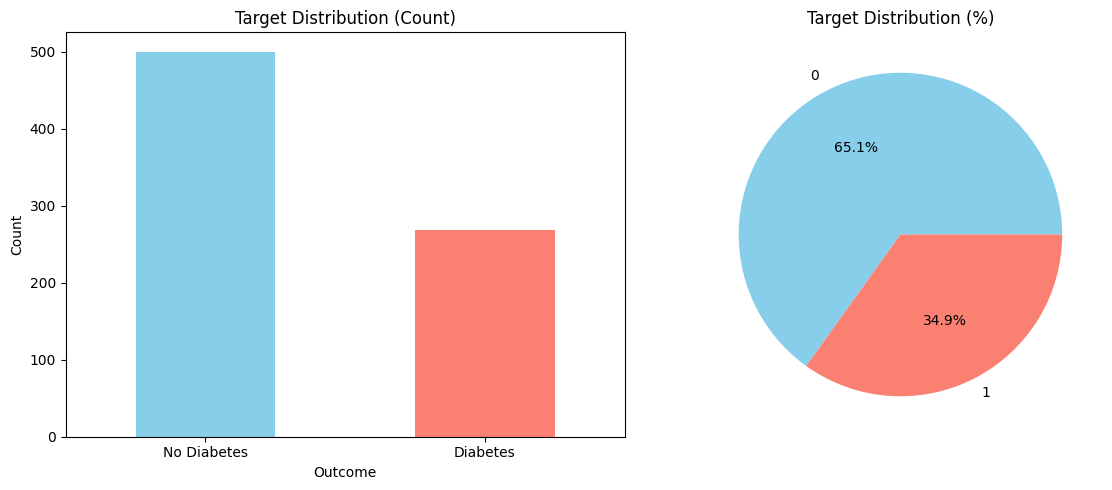

In [4]:
# Check target variable distribution
print("🎯 Target Variable Distribution:")
target_counts = df['Outcome'].value_counts()
print(target_counts)
print(f"\nPercentage distribution:")
print(f"No Diabetes (0): {target_counts[0]/len(df)*100:.1f}%")
print(f"Diabetes (1): {target_counts[1]/len(df)*100:.1f}%")

# Visualize target distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
df['Outcome'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Target Distribution (Count)')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'], rotation=0)

plt.subplot(1, 2, 2)
df['Outcome'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title('Target Distribution (%)')
plt.ylabel('')

plt.tight_layout()
plt.show()

## 3. Data Preprocessing

In [5]:
# Separate features and target
X = df.drop('Outcome', axis=1)  # Features
y = df['Outcome']               # Target

print(f"📊 Features shape: {X.shape}")
print(f"🎯 Target shape: {y.shape}")
print(f"\n📋 Feature columns: {list(X.columns)}")

📊 Features shape: (768, 8)
🎯 Target shape: (768,)

📋 Feature columns: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"📊 Training set size: {X_train.shape[0]} samples")
print(f"📊 Testing set size: {X_test.shape[0]} samples")
print(f"📊 Training percentage: {X_train.shape[0]/len(df)*100:.1f}%")
print(f"📊 Testing percentage: {X_test.shape[0]/len(df)*100:.1f}%")

📊 Training set size: 614 samples
📊 Testing set size: 154 samples
📊 Training percentage: 79.9%
📊 Testing percentage: 20.1%


In [7]:
# Feature scaling (important for SVM and KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Feature scaling completed!")
print(f"Original range (Glucose): {X_train['Glucose'].min():.2f} to {X_train['Glucose'].max():.2f}")
print(f"Scaled range: {X_train_scaled[:, 1].min():.2f} to {X_train_scaled[:, 1].max():.2f}")

✅ Feature scaling completed!
Original range (Glucose): 0.00 to 199.00
Scaled range: -3.83 to 2.48


## 4. Model Training and Evaluation

In [8]:
# Initialize the models
models = {
    'SVM': SVC(kernel='rbf', random_state=42, probability=True),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=5),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

print("🤖 Models initialized:")
for name in models.keys():
    print(f"  ✓ {name}")

🤖 Models initialized:
  ✓ SVM
  ✓ Naive Bayes
  ✓ Decision Tree
  ✓ KNN


In [9]:
# Train models and store results
results = {}
predictions = {}
probabilities = {}

print("🚀 Training models...\n")

for name, model in models.items():
    print(f"Training {name}...")
    
    # Use scaled data for SVM and KNN, original data for others
    if name in ['SVM', 'KNN']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_prob = model.predict_proba(X_test_scaled)[:, 1]
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]
    
    # Store predictions and probabilities
    predictions[name] = y_pred
    probabilities[name] = y_prob
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }
    
    print(f"  ✅ {name} trained successfully!")

print("\n🎉 All models trained successfully!")

🚀 Training models...

Training SVM...
  ✅ SVM trained successfully!
Training Naive Bayes...
  ✅ Naive Bayes trained successfully!
Training Decision Tree...
  ✅ Decision Tree trained successfully!
Training KNN...
  ✅ KNN trained successfully!

🎉 All models trained successfully!


## 5. Performance Comparison

In [10]:
# Create results DataFrame
results_df = pd.DataFrame(results).T
results_df = results_df.round(4)

print("📊 Model Performance Comparison:")
print("=" * 50)
display(results_df)

# Find best performing model for each metric
print("\n🏆 Best Performing Models:")
print("=" * 30)
for metric in results_df.columns:
    best_model = results_df[metric].idxmax()
    best_score = results_df[metric].max()
    print(f"{metric}: {best_model} ({best_score:.4f})")

📊 Model Performance Comparison:


,Accuracy,Precision,Recall,F1-Score
SVM,0.7532,0.6600,0.6111,0.6346
Naive Bayes,0.7078,0.5738,0.6481,0.6087
Decision Tree,0.7922,0.7037,0.7037,0.7037
KNN,0.7013,0.5833,0.5185,0.5490



🏆 Best Performing Models:
Accuracy: Decision Tree (0.7922)
Precision: Decision Tree (0.7037)
Recall: Decision Tree (0.7037)
F1-Score: Decision Tree (0.7037)


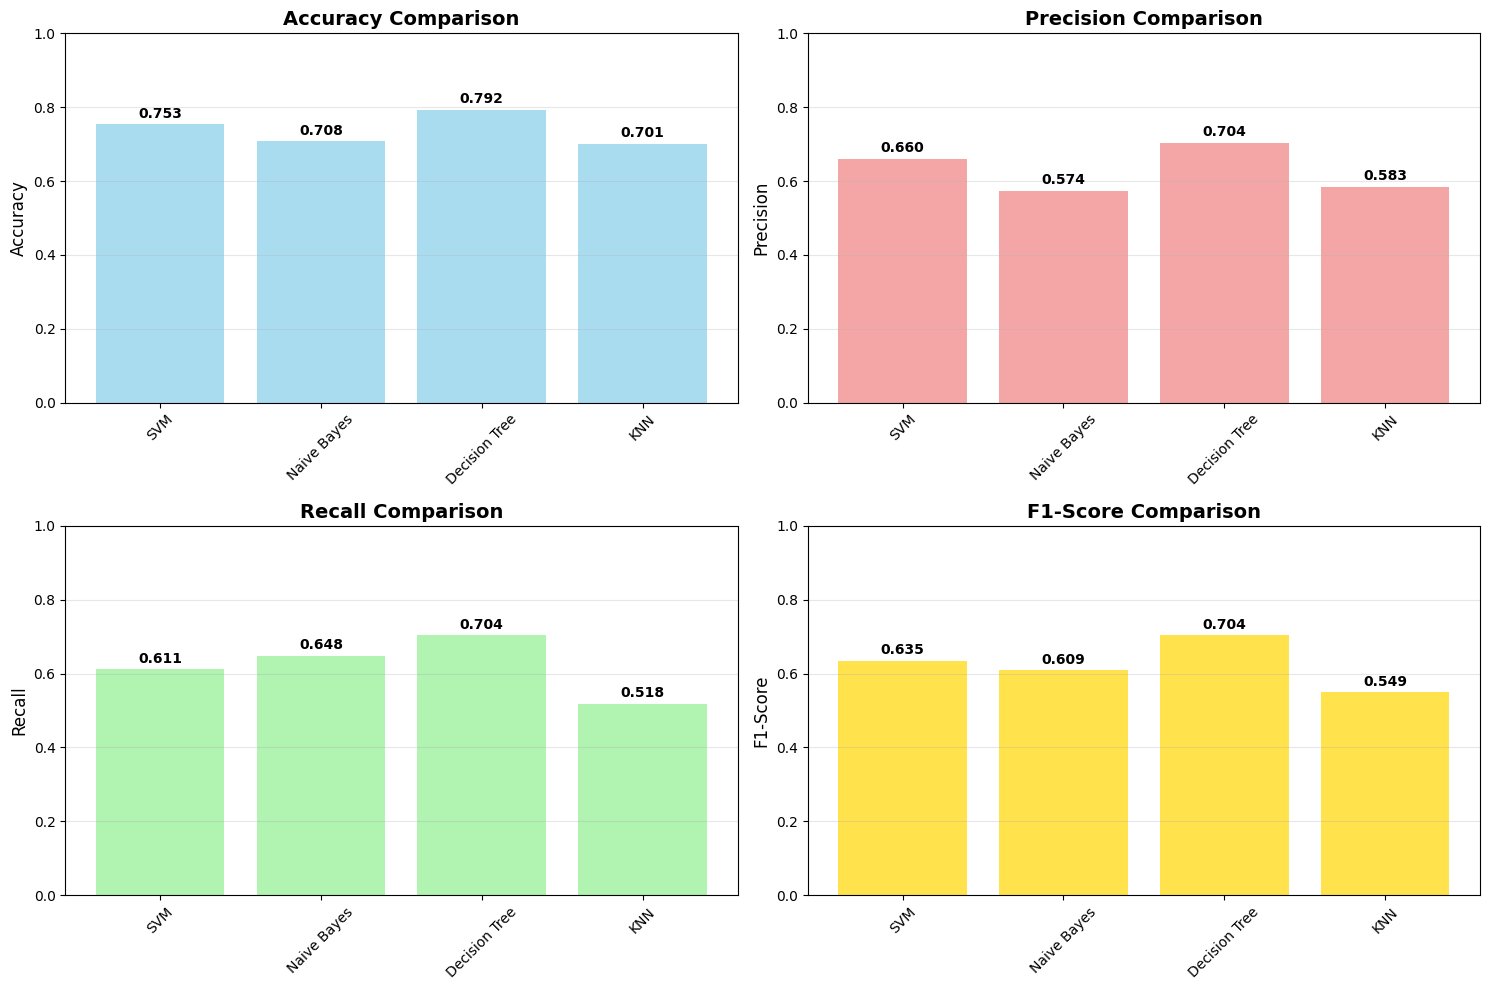

In [11]:
# Visualize performance metrics
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold']

for i, metric in enumerate(metrics):
    ax = axes[i//2, i%2]
    bars = ax.bar(results_df.index, results_df[metric], color=colors[i], alpha=0.7)
    ax.set_title(f'{metric} Comparison', fontsize=14, fontweight='bold')
    ax.set_ylabel(metric, fontsize=12)
    ax.set_ylim(0, 1)
    
    # Add value labels on bars
    for bar, value in zip(bars, results_df[metric]):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                f'{value:.3f}', ha='center', va='bottom', fontweight='bold')
    
    ax.tick_params(axis='x', rotation=45)
    ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## 6. Confusion Matrix Heatmaps

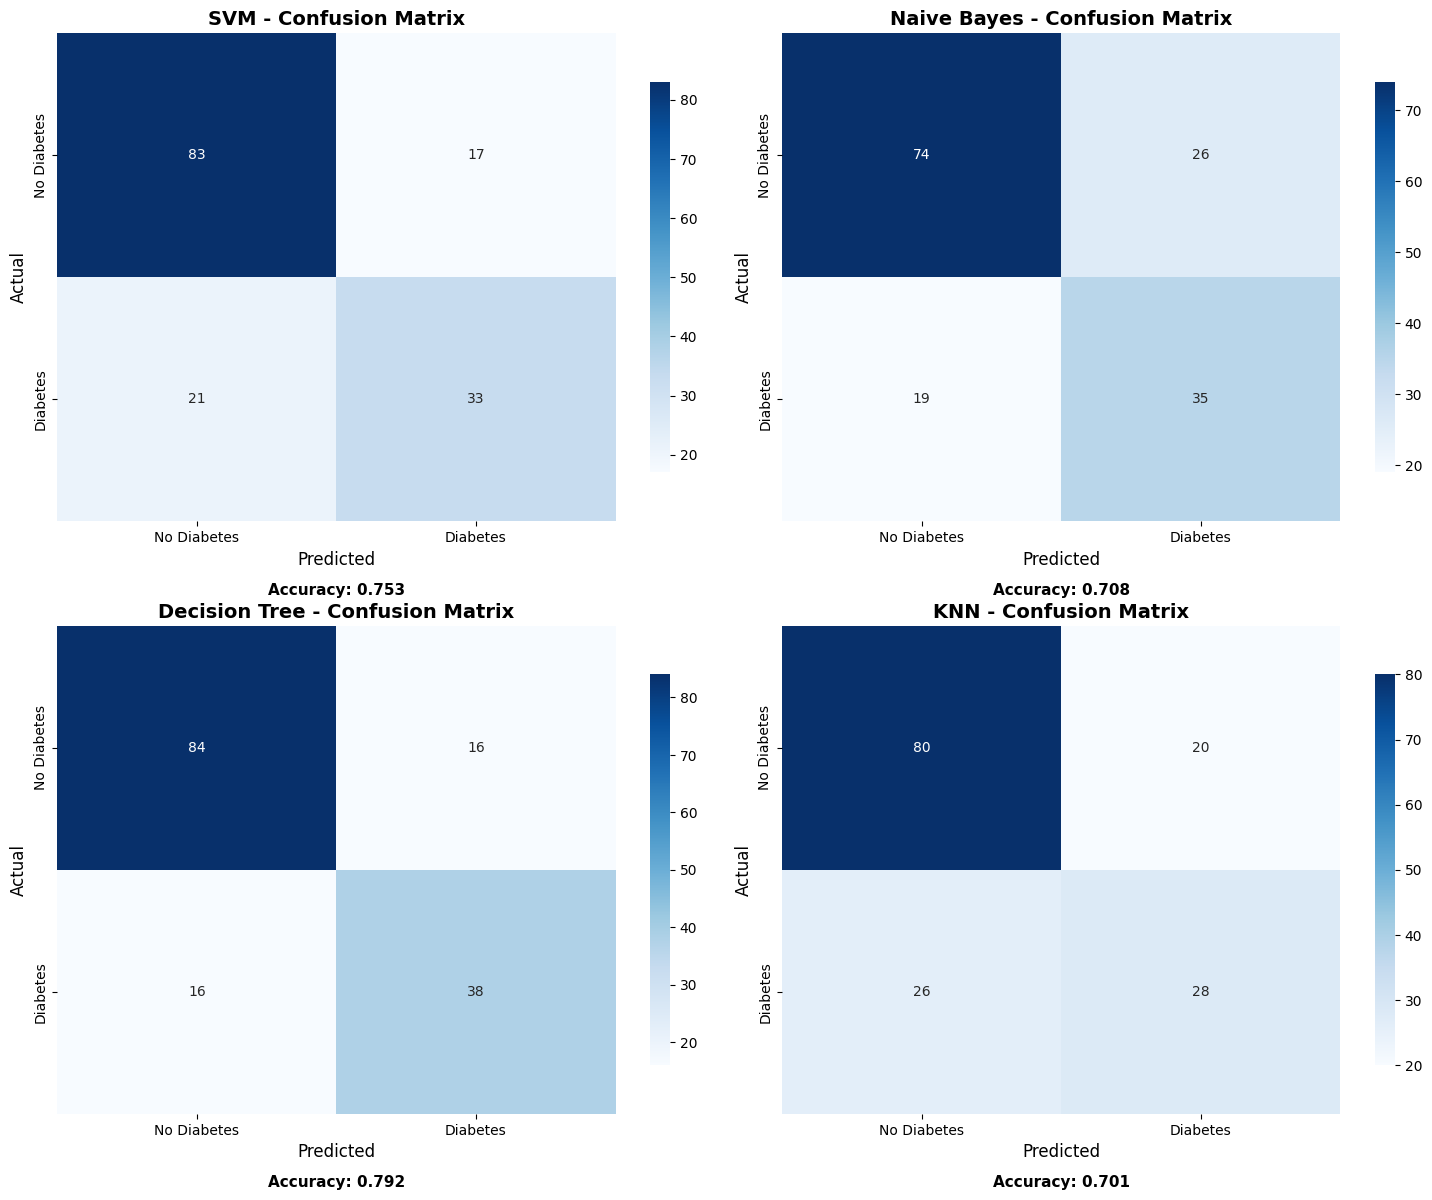

In [12]:
# Create confusion matrices for all models
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

for i, (name, y_pred) in enumerate(predictions.items()):
    cm = confusion_matrix(y_test, y_pred)
    
    # Create heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['No Diabetes', 'Diabetes'],
                yticklabels=['No Diabetes', 'Diabetes'],
                ax=axes[i], cbar_kws={'shrink': 0.8})
    
    axes[i].set_title(f'{name} - Confusion Matrix', fontsize=14, fontweight='bold')
    axes[i].set_xlabel('Predicted', fontsize=12)
    axes[i].set_ylabel('Actual', fontsize=12)
    
    # Add accuracy to the plot
    accuracy = accuracy_score(y_test, y_pred)
    axes[i].text(0.5, -0.15, f'Accuracy: {accuracy:.3f}', 
                transform=axes[i].transAxes, ha='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

## 7. ROC Curves Comparison

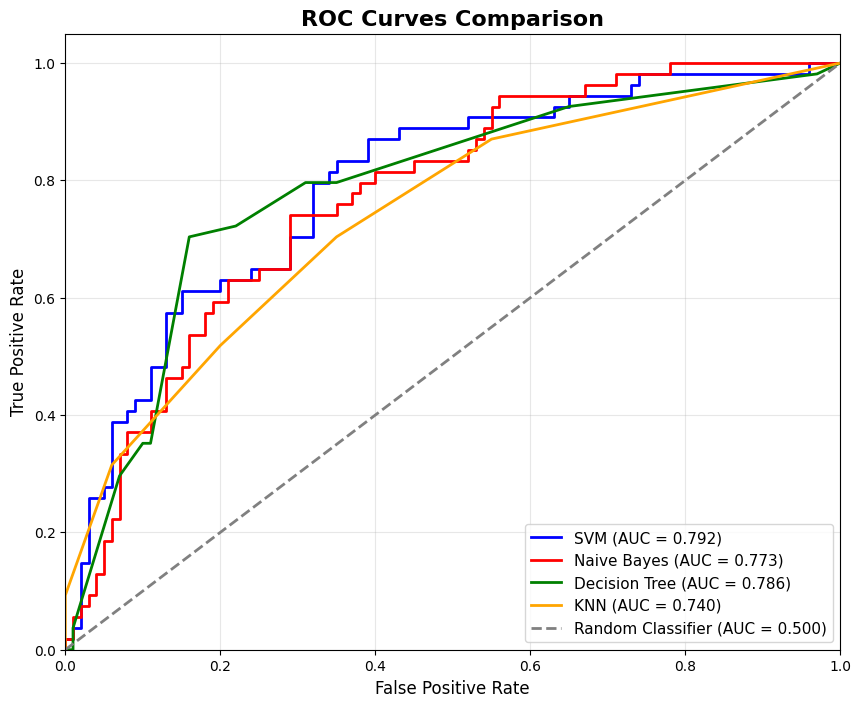

📈 AUC Scores Ranking:
1. SVM: 0.7924
2. Decision Tree: 0.7858
3. Naive Bayes: 0.7728
4. KNN: 0.7405


In [13]:
# Plot ROC curves for all models
plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green', 'orange']
auc_scores = {}

for i, (name, y_prob) in enumerate(probabilities.items()):
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    auc_scores[name] = roc_auc
    
    plt.plot(fpr, tpr, color=colors[i], lw=2, 
             label=f'{name} (AUC = {roc_auc:.3f})')

# Plot diagonal line (random classifier)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', 
         label='Random Classifier (AUC = 0.500)')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves Comparison', fontsize=16, fontweight='bold')
plt.legend(loc="lower right", fontsize=11)
plt.grid(alpha=0.3)
plt.show()

# Display AUC scores
print("📈 AUC Scores Ranking:")
print("=" * 25)
sorted_auc = sorted(auc_scores.items(), key=lambda x: x[1], reverse=True)
for i, (name, score) in enumerate(sorted_auc, 1):
    print(f"{i}. {name}: {score:.4f}")

## 8. Detailed Classification Reports

In [14]:
# Print detailed classification reports for each model
for name, y_pred in predictions.items():
    print(f"\n📋 {name} - Detailed Classification Report:")
    print("=" * 50)
    print(classification_report(y_test, y_pred, 
                              target_names=['No Diabetes', 'Diabetes']))
    print("-" * 50)


📋 SVM - Detailed Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.80      0.83      0.81       100
    Diabetes       0.66      0.61      0.63        54

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154

--------------------------------------------------

📋 Naive Bayes - Detailed Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.80      0.74      0.77       100
    Diabetes       0.57      0.65      0.61        54

    accuracy                           0.71       154
   macro avg       0.68      0.69      0.69       154
weighted avg       0.72      0.71      0.71       154

--------------------------------------------------

📋 Decision Tree - Detailed Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.84      0.84      0.84     

## 9. Summary and Recommendations

In [ ]:
# Create comprehensive summary
print("🎯 DIABETES PREDICTION MODEL COMPARISON SUMMARY")
print("=" * 55)

# Overall best model
overall_scores = results_df.mean(axis=1).sort_values(ascending=False)
best_overall = overall_scores.index[0]
best_score = overall_scores.iloc[0]

print(f"\n🏆 BEST OVERALL MODEL: {best_overall}")
print(f"   Average Score: {best_score:.4f}")

print(f"\n📊 DETAILED PERFORMANCE:")
for model in results_df.index:
    acc = results_df.loc[model, 'Accuracy']
    f1 = results_df.loc[model, 'F1-Score']
    auc_score = auc_scores[model]
    print(f"   {model:15} | Accuracy: {acc:.3f} | F1: {f1:.3f} | AUC: {auc_score:.3f}")

print(f"\n💡 RECOMMENDATIONS:")
print(f"   • For highest accuracy: Use {results_df['Accuracy'].idxmax()}")
print(f"   • For balanced performance: Use {results_df['F1-Score'].idxmax()}")
print(f"   • For best discrimination: Use {max(auc_scores, key=auc_scores.get)}")

print(f"\n📈 KEY INSIGHTS:")
print(f"   • Dataset size: {len(df)} samples")
print(f"   • Features used: {len(X.columns)}")
print(f"   • Class distribution: {target_counts[0]} non-diabetic, {target_counts[1]} diabetic")
print(f"   • Test set size: {len(y_test)} samples")

print("\n✅ Analysis completed successfully!")

🎯 DIABETES PREDICTION MODEL COMPARISON SUMMARY

🏆 BEST OVERALL MODEL: Decision Tree
   Average Score: 0.7258

📊 DETAILED PERFORMANCE:
   SVM             | Accuracy: 0.753 | F1: 0.635 | AUC: 0.792
   Naive Bayes     | Accuracy: 0.708 | F1: 0.609 | AUC: 0.773
   Decision Tree   | Accuracy: 0.792 | F1: 0.704 | AUC: 0.786
   KNN             | Accuracy: 0.701 | F1: 0.549 | AUC: 0.740

💡 RECOMMENDATIONS:
   • For highest accuracy: Use Decision Tree
   • For balanced performance: Use Decision Tree
   • For best discrimination: Use SVM

📈 KEY INSIGHTS:
   • Dataset size: 768 samples
   • Features used: 8
   • Class distribution: 500 non-diabetic, 268 diabetic
   • Test set size: 154 samples

✅ Analysis completed successfully!
